<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S6/Copy_of_S6_AssignmentSolution(ModularizedCode).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required Libraries**


In [1]:
from __future__ import print_function

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA4B2-TSAI/MNIST Library')

In [0]:
# Import packages from drive
  
from rohan_library import * 
import mnist_execute as execute
import image_transformations
import DataLoaders as loader  
# import visualizeData as viz
import BN_GBN as main
import mnist_utils as utils


load_libs() # loads all the required libraries


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR
import torchvision
import numpy as np
import sys

# since rohan_lib is not working I'll have to do it this way. Later I'll package the same

**Data Transformations**


* Here I've created a Class to transform Train & Test Data. And I'm using Compose function to chain in all the transform operations required in the form of list and then pass it on the different sets of data.
* I have already set the mean and the standard deviation to 0.1307 & 0.3081 
* 2 main parameters normalize(boolean) and rotate(default value = 0).


In [0]:
# Add image transformations for both train & test dataset
channel_means = 0.1307
channel_stdevs = 0.3081
trans = image_transformations.Transforms(normalize=True, mean=channel_means, stdev=channel_stdevs)
from torchvision import transforms


trainTrans = trans.train_transforms([
                                     transforms.RandomRotation((-10.0, 10.0), fill=(1,))])
                                    #  transforms.RandomHorizontalFlip(p=0.5),
                                    #  transforms.RandomVerticalFlip(p=0.5)

testTrans = trans.test_transforms()

In [6]:
# Split Test & Train Data

from torchvision import datasets


train = datasets.MNIST('./data', train = True, download = True, transform = trainTrans)
test = datasets.MNIST('./data', train = False, download = True, transform = testTrans)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


**Dataloaders Arguments & Train/Test Dataloaders**

In [0]:
dl = loader.DataLoaders()
trainloader = dl.dataLoader(train)
testloader = dl.dataLoader(test)

**Data Statistics**

torch.Size([128, 1, 28, 28])
torch.Size([128])


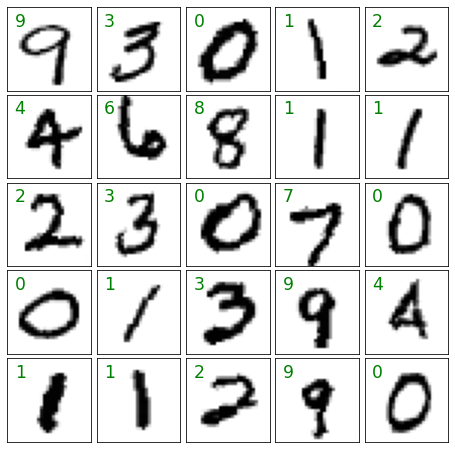

In [8]:

data_iter = iter(trainloader)
images, labels = data_iter.next()

print(images.shape) # [batch_size, 1, 28, 28]
print(labels.shape) # [batch_size]

utils.display_25(images[:25], labels[:25])

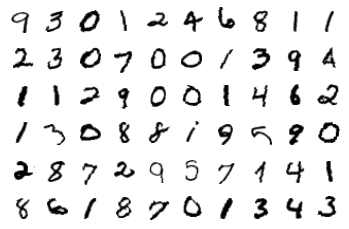

In [9]:
# Just curious at the orientation of these mnist images
import matplotlib.pyplot as plt
figure = plt.figure()
num_of_images = 60
def mnist_data_display(num_of_images):
  
  for i in range(1,num_of_images+1):
    plt.subplot(6,10, i)
    plt.axis('off')
    plt.imshow(images[i-1].numpy().squeeze(), cmap = 'gray_r')
mnist_data_display(num_of_images)

**Model Summary**

In [12]:
# BN Model Summary 
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = main.Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           1,440
             ReLU-11           [-1, 16, 10, 10]               0
      BatchNorm2d-12           [-1, 16, 10, 10]              32
          Dropout-13           [-1, 16, 10, 10]               0
           Conv2d-14             [-1, 1

In [14]:
use_cuda = torch.cuda.is_available()t
device = torch.device("cuda" if use_cuda else "cpu")


BatchNorm_Model = main.BN_Models(device, trainloader, testloader)

bn_modelTuple = iter(BatchNorm_Model.withoutL1_L2_BN(), 
                    BatchNorm_Model.withL1_BN(),
                    BatchNorm_Model.withL2_BN(),
                    BatchNorm_Model.withL1_L2_BN()
)

print(bn_modelTuple.__next__())


  0%|          | 0/469 [00:00<?, ?it/s]

without L1 and L2 regularization with BN
EPOCH: 1


Loss=0.1009019985795021 Batch_id=468 Accuracy=87.43: 100%|██████████| 469/469 [00:12<00:00, 38.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0662).  Saving model ...

Test set: Average loss: 0.0662, Accuracy: 9793/10000 (97.93%)

EPOCH: 2


Loss=0.043515682220458984 Batch_id=468 Accuracy=97.38: 100%|██████████| 469/469 [00:12<00:00, 38.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0728, Accuracy: 9752/10000 (97.52%)

EPOCH: 3


Loss=0.042537871748209 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:11<00:00, 39.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0662 --> 0.0394).  Saving model ...

Test set: Average loss: 0.0394, Accuracy: 9874/10000 (98.74%)

EPOCH: 4


Loss=0.039213623851537704 Batch_id=468 Accuracy=98.15: 100%|██████████| 469/469 [00:11<00:00, 39.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0394 --> 0.0351).  Saving model ...

Test set: Average loss: 0.0351, Accuracy: 9886/10000 (98.86%)

EPOCH: 5


Loss=0.0037793766241520643 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:11<00:00, 39.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0351 --> 0.0315).  Saving model ...

Test set: Average loss: 0.0315, Accuracy: 9886/10000 (98.86%)

EPOCH: 6


Loss=0.019031072035431862 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:13<00:00, 35.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0315 --> 0.0278).  Saving model ...

Test set: Average loss: 0.0278, Accuracy: 9914/10000 (99.14%)

EPOCH: 7


Loss=0.037106554955244064 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:12<00:00, 37.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9895/10000 (98.95%)

EPOCH: 8


Loss=0.06423970311880112 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:12<00:00, 38.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0278 --> 0.0225).  Saving model ...

Test set: Average loss: 0.0225, Accuracy: 9926/10000 (99.26%)

EPOCH: 9


Loss=0.046684011816978455 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:12<00:00, 38.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9907/10000 (99.07%)

EPOCH: 10


Loss=0.03803010657429695 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:12<00:00, 38.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0236, Accuracy: 9926/10000 (99.26%)

EPOCH: 11


Loss=0.05924375355243683 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:12<00:00, 38.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 9910/10000 (99.10%)

EPOCH: 12


Loss=0.006432597991079092 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:13<00:00, 33.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 9921/10000 (99.21%)

EPOCH: 13


Loss=0.025287240743637085 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:12<00:00, 37.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9922/10000 (99.22%)

EPOCH: 14


Loss=0.04336974024772644 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:11<00:00, 39.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0236, Accuracy: 9929/10000 (99.29%)

EPOCH: 15


Loss=0.01959974505007267 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:12<00:00, 38.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0225 --> 0.0189).  Saving model ...

Test set: Average loss: 0.0189, Accuracy: 9946/10000 (99.46%)

EPOCH: 16


Loss=0.007160797715187073 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:12<00:00, 38.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9927/10000 (99.27%)

EPOCH: 17


Loss=0.0056065223179757595 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:12<00:00, 38.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9931/10000 (99.31%)

EPOCH: 18


Loss=0.0057058087550103664 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:12<00:00, 38.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Accuracy: 9936/10000 (99.36%)

EPOCH: 19


Loss=0.004172623157501221 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:12<00:00, 38.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0189 --> 0.0185).  Saving model ...

Test set: Average loss: 0.0185, Accuracy: 9939/10000 (99.39%)

EPOCH: 20


Loss=0.00427768612280488 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:11<00:00, 39.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0185 --> 0.0179).  Saving model ...

Test set: Average loss: 0.0179, Accuracy: 9937/10000 (99.37%)

EPOCH: 21


Loss=0.024127790704369545 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:14<00:00, 32.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9943/10000 (99.43%)

EPOCH: 22


Loss=0.002119367243722081 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:12<00:00, 37.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0179 --> 0.0170).  Saving model ...

Test set: Average loss: 0.0170, Accuracy: 9946/10000 (99.46%)

EPOCH: 23


Loss=0.003915140870958567 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:12<00:00, 39.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0170 --> 0.0160).  Saving model ...

Test set: Average loss: 0.0160, Accuracy: 9952/10000 (99.52%)

EPOCH: 24


Loss=0.035541847348213196 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:12<00:00, 38.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0160 --> 0.0155).  Saving model ...

Test set: Average loss: 0.0155, Accuracy: 9953/10000 (99.53%)

EPOCH: 25


Loss=0.006297210697084665 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:12<00:00, 38.92it/s]


Validation loss has  decreased (0.0155 --> 0.0153).  Saving model ...

Test set: Average loss: 0.0153, Accuracy: 9950/10000 (99.50%)



  0%|          | 0/469 [00:00<?, ?it/s]

with L1 regularization with BN
EPOCH: 1


Loss=0.09415729343891144 Batch_id=468 Accuracy=85.03: 100%|██████████| 469/469 [00:12<00:00, 36.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0791).  Saving model ...

Test set: Average loss: 0.0791, Accuracy: 9752/10000 (97.52%)

EPOCH: 2


Loss=0.10871774703264236 Batch_id=468 Accuracy=97.22: 100%|██████████| 469/469 [00:12<00:00, 36.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0791 --> 0.0513).  Saving model ...

Test set: Average loss: 0.0513, Accuracy: 9836/10000 (98.36%)

EPOCH: 3


Loss=0.08791191875934601 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:12<00:00, 37.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0513 --> 0.0410).  Saving model ...

Test set: Average loss: 0.0410, Accuracy: 9873/10000 (98.73%)

EPOCH: 4


Loss=0.050481442362070084 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:12<00:00, 37.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0427, Accuracy: 9866/10000 (98.66%)

EPOCH: 5


Loss=0.040932804346084595 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:12<00:00, 36.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0410 --> 0.0267).  Saving model ...

Test set: Average loss: 0.0267, Accuracy: 9923/10000 (99.23%)

EPOCH: 6


Loss=0.035579390823841095 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:12<00:00, 36.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0267 --> 0.0265).  Saving model ...

Test set: Average loss: 0.0265, Accuracy: 9913/10000 (99.13%)

EPOCH: 7


Loss=0.1453404426574707 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:12<00:00, 36.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0284, Accuracy: 9906/10000 (99.06%)

EPOCH: 8


Loss=0.12311927229166031 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:12<00:00, 36.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0265 --> 0.0246).  Saving model ...

Test set: Average loss: 0.0246, Accuracy: 9920/10000 (99.20%)

EPOCH: 9


Loss=0.01538348663598299 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:12<00:00, 36.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0283, Accuracy: 9911/10000 (99.11%)

EPOCH: 10


Loss=0.08524499088525772 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:12<00:00, 36.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0246 --> 0.0242).  Saving model ...

Test set: Average loss: 0.0242, Accuracy: 9924/10000 (99.24%)

EPOCH: 11


Loss=0.09222026914358139 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:12<00:00, 36.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0242 --> 0.0202).  Saving model ...

Test set: Average loss: 0.0202, Accuracy: 9936/10000 (99.36%)

EPOCH: 12


Loss=0.02955036237835884 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:12<00:00, 37.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 9929/10000 (99.29%)

EPOCH: 13


Loss=0.02786533534526825 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:12<00:00, 37.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0202 --> 0.0187).  Saving model ...

Test set: Average loss: 0.0187, Accuracy: 9938/10000 (99.38%)

EPOCH: 14


Loss=0.028760286048054695 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:12<00:00, 37.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9936/10000 (99.36%)

EPOCH: 15


Loss=0.07554157823324203 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:12<00:00, 37.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9934/10000 (99.34%)

EPOCH: 16


Loss=0.020909346640110016 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:12<00:00, 36.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Accuracy: 9924/10000 (99.24%)

EPOCH: 17


Loss=0.02260785922408104 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:12<00:00, 37.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9937/10000 (99.37%)

EPOCH: 18


Loss=0.014251813292503357 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:12<00:00, 37.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0187 --> 0.0186).  Saving model ...

Test set: Average loss: 0.0186, Accuracy: 9932/10000 (99.32%)

EPOCH: 19


Loss=0.08994480967521667 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:12<00:00, 37.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0186 --> 0.0178).  Saving model ...

Test set: Average loss: 0.0178, Accuracy: 9936/10000 (99.36%)

EPOCH: 20


Loss=0.023556850850582123 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:12<00:00, 37.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9945/10000 (99.45%)

EPOCH: 21


Loss=0.05112283676862717 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:12<00:00, 37.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0178 --> 0.0160).  Saving model ...

Test set: Average loss: 0.0160, Accuracy: 9951/10000 (99.51%)

EPOCH: 22


Loss=0.013505631126463413 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:12<00:00, 36.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 9946/10000 (99.46%)

EPOCH: 23


Loss=0.021314840763807297 Batch_id=468 Accuracy=99.49: 100%|██████████| 469/469 [00:12<00:00, 37.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 9947/10000 (99.47%)

EPOCH: 24


Loss=0.018867166712880135 Batch_id=468 Accuracy=99.51: 100%|██████████| 469/469 [00:12<00:00, 37.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0160, Accuracy: 9950/10000 (99.50%)

EPOCH: 25


Loss=0.021532349288463593 Batch_id=468 Accuracy=99.51: 100%|██████████| 469/469 [00:12<00:00, 37.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 9946/10000 (99.46%)

with L2 regularization with BN
EPOCH: 1


Loss=0.11744162440299988 Batch_id=468 Accuracy=85.97: 100%|██████████| 469/469 [00:11<00:00, 39.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0651).  Saving model ...

Test set: Average loss: 0.0651, Accuracy: 9793/10000 (97.93%)

EPOCH: 2


Loss=0.06246687471866608 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:11<00:00, 39.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0651 --> 0.0586).  Saving model ...

Test set: Average loss: 0.0586, Accuracy: 9817/10000 (98.17%)

EPOCH: 3


Loss=0.012920603156089783 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:11<00:00, 39.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0586 --> 0.0366).  Saving model ...

Test set: Average loss: 0.0366, Accuracy: 9884/10000 (98.84%)

EPOCH: 4


Loss=0.1526843160390854 Batch_id=468 Accuracy=98.15: 100%|██████████| 469/469 [00:11<00:00, 39.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0366 --> 0.0326).  Saving model ...

Test set: Average loss: 0.0326, Accuracy: 9896/10000 (98.96%)

EPOCH: 5


Loss=0.007499024271965027 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:11<00:00, 39.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0326 --> 0.0315).  Saving model ...

Test set: Average loss: 0.0315, Accuracy: 9903/10000 (99.03%)

EPOCH: 6


Loss=0.07208919525146484 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:11<00:00, 39.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0322, Accuracy: 9903/10000 (99.03%)

EPOCH: 7


Loss=0.1612691581249237 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:12<00:00, 38.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0315 --> 0.0244).  Saving model ...

Test set: Average loss: 0.0244, Accuracy: 9931/10000 (99.31%)

EPOCH: 8


Loss=0.034833576530218124 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:11<00:00, 39.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0266, Accuracy: 9910/10000 (99.10%)

EPOCH: 9


Loss=0.04017084464430809 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:12<00:00, 38.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0293, Accuracy: 9909/10000 (99.09%)

EPOCH: 10


Loss=0.021841352805495262 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:11<00:00, 39.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0350, Accuracy: 9895/10000 (98.95%)

EPOCH: 11


Loss=0.03455368056893349 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:11<00:00, 39.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0244 --> 0.0239).  Saving model ...

Test set: Average loss: 0.0239, Accuracy: 9926/10000 (99.26%)

EPOCH: 12


Loss=0.004417553544044495 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:11<00:00, 39.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0239 --> 0.0198).  Saving model ...

Test set: Average loss: 0.0198, Accuracy: 9933/10000 (99.33%)

EPOCH: 13


Loss=0.017312368378043175 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:11<00:00, 39.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9929/10000 (99.29%)

EPOCH: 14


Loss=0.0832495465874672 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:11<00:00, 39.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 9932/10000 (99.32%)

EPOCH: 15


Loss=0.009117881767451763 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:12<00:00, 38.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9929/10000 (99.29%)

EPOCH: 16


Loss=0.05234084650874138 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:11<00:00, 39.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9930/10000 (99.30%)

EPOCH: 17


Loss=0.10965564846992493 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:11<00:00, 39.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0198 --> 0.0186).  Saving model ...

Test set: Average loss: 0.0186, Accuracy: 9927/10000 (99.27%)

EPOCH: 18


Loss=0.040180694311857224 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:11<00:00, 39.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0186 --> 0.0157).  Saving model ...

Test set: Average loss: 0.0157, Accuracy: 9948/10000 (99.48%)

EPOCH: 19


Loss=0.008114238269627094 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:12<00:00, 39.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9944/10000 (99.44%)

EPOCH: 20


Loss=0.026338612660765648 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:11<00:00, 39.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)

EPOCH: 21


Loss=0.0028914809226989746 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:12<00:00, 38.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0157 --> 0.0153).  Saving model ...

Test set: Average loss: 0.0153, Accuracy: 9943/10000 (99.43%)

EPOCH: 22


Loss=0.014400601387023926 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:11<00:00, 39.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 9948/10000 (99.48%)

EPOCH: 23


Loss=0.014996632933616638 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:11<00:00, 39.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 9948/10000 (99.48%)

EPOCH: 24


Loss=0.016934862360358238 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:11<00:00, 39.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 9949/10000 (99.49%)

EPOCH: 25


Loss=0.006469751242548227 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:11<00:00, 39.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0155, Accuracy: 9950/10000 (99.50%)

with L1 & L2 regularization with BN
EPOCH: 1


Loss=0.2017795592546463 Batch_id=468 Accuracy=86.59: 100%|██████████| 469/469 [00:12<00:00, 36.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0606).  Saving model ...

Test set: Average loss: 0.0606, Accuracy: 9801/10000 (98.01%)

EPOCH: 2


Loss=0.0430939644575119 Batch_id=468 Accuracy=97.38: 100%|██████████| 469/469 [00:12<00:00, 36.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0606 --> 0.0454).  Saving model ...

Test set: Average loss: 0.0454, Accuracy: 9853/10000 (98.53%)

EPOCH: 3


Loss=0.0891965925693512 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:12<00:00, 37.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0454 --> 0.0359).  Saving model ...

Test set: Average loss: 0.0359, Accuracy: 9889/10000 (98.89%)

EPOCH: 4


Loss=0.04575144127011299 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:12<00:00, 37.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0359 --> 0.0346).  Saving model ...

Test set: Average loss: 0.0346, Accuracy: 9896/10000 (98.96%)

EPOCH: 5


Loss=0.04441658407449722 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:12<00:00, 36.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0346 --> 0.0306).  Saving model ...

Test set: Average loss: 0.0306, Accuracy: 9902/10000 (99.02%)

EPOCH: 6


Loss=0.04387268051505089 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:12<00:00, 36.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9908/10000 (99.08%)

EPOCH: 7


Loss=0.05847637727856636 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:12<00:00, 36.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0306 --> 0.0286).  Saving model ...

Test set: Average loss: 0.0286, Accuracy: 9902/10000 (99.02%)

EPOCH: 8


Loss=0.11679090559482574 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:12<00:00, 36.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0286 --> 0.0256).  Saving model ...

Test set: Average loss: 0.0256, Accuracy: 9924/10000 (99.24%)

EPOCH: 9


Loss=0.09823077917098999 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:12<00:00, 37.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0293, Accuracy: 9899/10000 (98.99%)

EPOCH: 10


Loss=0.03638344258069992 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:12<00:00, 37.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0256 --> 0.0227).  Saving model ...

Test set: Average loss: 0.0227, Accuracy: 9925/10000 (99.25%)

EPOCH: 11


Loss=0.01926206238567829 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:12<00:00, 36.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9916/10000 (99.16%)

EPOCH: 12


Loss=0.20780201256275177 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:12<00:00, 37.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0227 --> 0.0219).  Saving model ...

Test set: Average loss: 0.0219, Accuracy: 9934/10000 (99.34%)

EPOCH: 13


Loss=0.03373522311449051 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:12<00:00, 36.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0219 --> 0.0203).  Saving model ...

Test set: Average loss: 0.0203, Accuracy: 9929/10000 (99.29%)

EPOCH: 14


Loss=0.029024451971054077 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:12<00:00, 37.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9925/10000 (99.25%)

EPOCH: 15


Loss=0.044058963656425476 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:12<00:00, 37.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9935/10000 (99.35%)

EPOCH: 16


Loss=0.11209998279809952 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:12<00:00, 37.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 9934/10000 (99.34%)

EPOCH: 17


Loss=0.0801689475774765 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:12<00:00, 37.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0240, Accuracy: 9928/10000 (99.28%)

EPOCH: 18


Loss=0.029827238991856575 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:12<00:00, 36.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0203 --> 0.0177).  Saving model ...

Test set: Average loss: 0.0177, Accuracy: 9932/10000 (99.32%)

EPOCH: 19


Loss=0.01455342024564743 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:12<00:00, 36.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0177 --> 0.0177).  Saving model ...

Test set: Average loss: 0.0177, Accuracy: 9945/10000 (99.45%)

EPOCH: 20


Loss=0.018470540642738342 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:12<00:00, 36.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0177 --> 0.0174).  Saving model ...

Test set: Average loss: 0.0174, Accuracy: 9944/10000 (99.44%)

EPOCH: 21


Loss=0.0214044451713562 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:12<00:00, 36.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0174 --> 0.0161).  Saving model ...

Test set: Average loss: 0.0161, Accuracy: 9950/10000 (99.50%)

EPOCH: 22


Loss=0.020315105095505714 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:12<00:00, 36.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0161 --> 0.0150).  Saving model ...

Test set: Average loss: 0.0150, Accuracy: 9953/10000 (99.53%)

EPOCH: 23


Loss=0.03633532673120499 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:12<00:00, 36.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0152, Accuracy: 9948/10000 (99.48%)

EPOCH: 24


Loss=0.014752940274775028 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:12<00:00, 36.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0152, Accuracy: 9950/10000 (99.50%)

EPOCH: 25


Loss=0.0415082611143589 Batch_id=468 Accuracy=99.51: 100%|██████████| 469/469 [00:12<00:00, 36.51it/s]


Validation loss has  decreased (0.0150 --> 0.0148).  Saving model ...

Test set: Average loss: 0.0148, Accuracy: 9949/10000 (99.49%)



TypeError: ignored

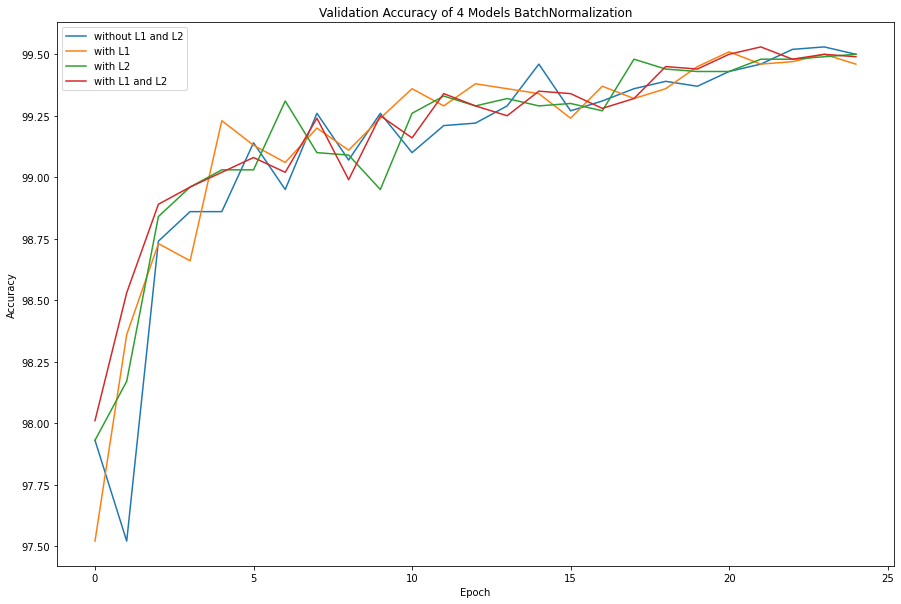

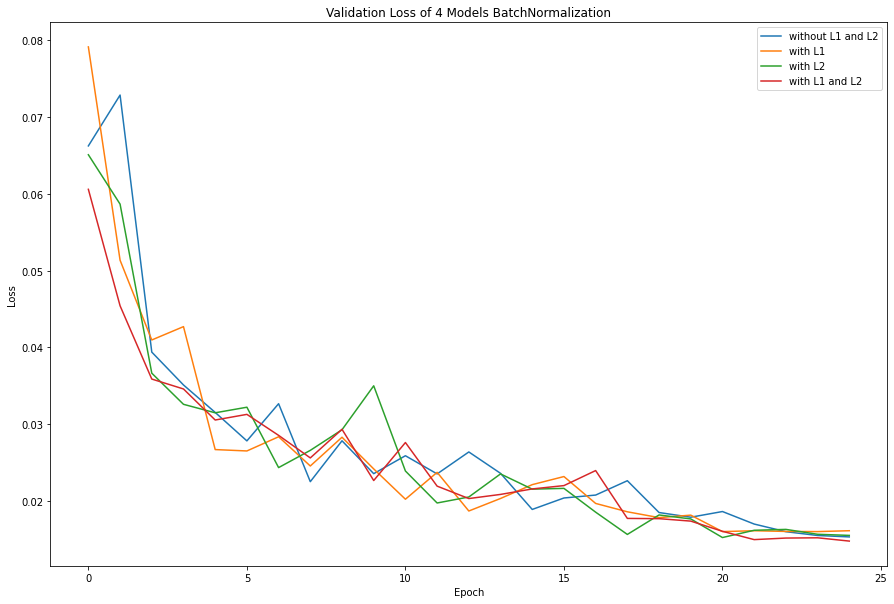

In [15]:
# Plot Val Accuracy and Loss curve

BatchNorm_Model.bn_plot_acc('ValidationAcc_BN')
BatchNorm_Model.bn_plot_loss('ValidationLoss_BN')

In [16]:
GhostBatchNorm_Model = main.GBN_Models(device, trainloader, testloader)

GhostBatchNorm_Model.withoutL1_L2_GBN()
GhostBatchNorm_Model.withL1_GBN()
GhostBatchNorm_Model.withL2_GBN()
GhostBatchNorm_Model.withL1_L2_GBN()


  0%|          | 0/469 [00:00<?, ?it/s]

without L1 and L2 regularization with GBN
EPOCH: 1


Loss=0.08016050606966019 Batch_id=468 Accuracy=85.83: 100%|██████████| 469/469 [00:12<00:00, 37.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0839).  Saving model ...

Test set: Average loss: 0.0839, Accuracy: 9730/10000 (97.30%)

EPOCH: 2


Loss=0.11672478169202805 Batch_id=468 Accuracy=97.26: 100%|██████████| 469/469 [00:12<00:00, 38.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0839 --> 0.0465).  Saving model ...

Test set: Average loss: 0.0465, Accuracy: 9851/10000 (98.51%)

EPOCH: 3


Loss=0.028444990515708923 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:12<00:00, 38.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0465 --> 0.0397).  Saving model ...

Test set: Average loss: 0.0397, Accuracy: 9885/10000 (98.85%)

EPOCH: 4


Loss=0.06570746749639511 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:11<00:00, 39.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0698, Accuracy: 9782/10000 (97.82%)

EPOCH: 5


Loss=0.02529144287109375 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:12<00:00, 38.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0397 --> 0.0291).  Saving model ...

Test set: Average loss: 0.0291, Accuracy: 9905/10000 (99.05%)

EPOCH: 6


Loss=0.024364104494452477 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:11<00:00, 39.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0291 --> 0.0275).  Saving model ...

Test set: Average loss: 0.0275, Accuracy: 9917/10000 (99.17%)

EPOCH: 7


Loss=0.05329899489879608 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:11<00:00, 39.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0275 --> 0.0234).  Saving model ...

Test set: Average loss: 0.0234, Accuracy: 9930/10000 (99.30%)

EPOCH: 8


Loss=0.2442178875207901 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:11<00:00, 39.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0238, Accuracy: 9931/10000 (99.31%)

EPOCH: 9


Loss=0.02137196622788906 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:11<00:00, 39.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0234 --> 0.0226).  Saving model ...

Test set: Average loss: 0.0226, Accuracy: 9923/10000 (99.23%)

EPOCH: 10


Loss=0.016296232119202614 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:11<00:00, 39.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0226 --> 0.0211).  Saving model ...

Test set: Average loss: 0.0211, Accuracy: 9934/10000 (99.34%)

EPOCH: 11


Loss=0.04856878146529198 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:12<00:00, 38.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9925/10000 (99.25%)

EPOCH: 12


Loss=0.1020946130156517 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:11<00:00, 39.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 9933/10000 (99.33%)

EPOCH: 13


Loss=0.020342648029327393 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:12<00:00, 38.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0211 --> 0.0201).  Saving model ...

Test set: Average loss: 0.0201, Accuracy: 9939/10000 (99.39%)

EPOCH: 14


Loss=0.03658035397529602 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:11<00:00, 39.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9932/10000 (99.32%)

EPOCH: 15


Loss=0.017916833981871605 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:11<00:00, 40.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9936/10000 (99.36%)

EPOCH: 16


Loss=0.05866560339927673 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:11<00:00, 39.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0201 --> 0.0192).  Saving model ...

Test set: Average loss: 0.0192, Accuracy: 9941/10000 (99.41%)

EPOCH: 17


Loss=0.011421228758990765 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:12<00:00, 38.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0192 --> 0.0186).  Saving model ...

Test set: Average loss: 0.0186, Accuracy: 9936/10000 (99.36%)

EPOCH: 18


Loss=0.019005993381142616 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:11<00:00, 40.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9936/10000 (99.36%)

EPOCH: 19


Loss=0.03016532026231289 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:11<00:00, 39.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0186 --> 0.0179).  Saving model ...

Test set: Average loss: 0.0179, Accuracy: 9945/10000 (99.45%)

EPOCH: 20


Loss=0.013544633984565735 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:11<00:00, 39.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9946/10000 (99.46%)

EPOCH: 21


Loss=0.015761837363243103 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:11<00:00, 39.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0179 --> 0.0171).  Saving model ...

Test set: Average loss: 0.0171, Accuracy: 9946/10000 (99.46%)

EPOCH: 22


Loss=0.019099527969956398 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:11<00:00, 40.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0171 --> 0.0165).  Saving model ...

Test set: Average loss: 0.0165, Accuracy: 9947/10000 (99.47%)

EPOCH: 23


Loss=0.04547323286533356 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:11<00:00, 39.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 9949/10000 (99.49%)

EPOCH: 24


Loss=0.0019059479236602783 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:11<00:00, 39.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0165 --> 0.0160).  Saving model ...

Test set: Average loss: 0.0160, Accuracy: 9952/10000 (99.52%)

EPOCH: 25


Loss=0.010461498983204365 Batch_id=468 Accuracy=99.49: 100%|██████████| 469/469 [00:11<00:00, 40.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 9950/10000 (99.50%)

with L1 regularization with GBN
EPOCH: 1


Loss=0.16347551345825195 Batch_id=468 Accuracy=86.51: 100%|██████████| 469/469 [00:12<00:00, 37.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0693).  Saving model ...

Test set: Average loss: 0.0693, Accuracy: 9775/10000 (97.75%)

EPOCH: 2


Loss=0.17933721840381622 Batch_id=468 Accuracy=97.14: 100%|██████████| 469/469 [00:12<00:00, 37.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0693 --> 0.0573).  Saving model ...

Test set: Average loss: 0.0573, Accuracy: 9821/10000 (98.21%)

EPOCH: 3


Loss=0.05591484531760216 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:12<00:00, 38.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0573 --> 0.0361).  Saving model ...

Test set: Average loss: 0.0361, Accuracy: 9887/10000 (98.87%)

EPOCH: 4


Loss=0.058508533984422684 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:12<00:00, 37.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0361 --> 0.0328).  Saving model ...

Test set: Average loss: 0.0328, Accuracy: 9889/10000 (98.89%)

EPOCH: 5


Loss=0.1511698216199875 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:12<00:00, 38.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0350, Accuracy: 9889/10000 (98.89%)

EPOCH: 6


Loss=0.04204064607620239 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:12<00:00, 37.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0328 --> 0.0316).  Saving model ...

Test set: Average loss: 0.0316, Accuracy: 9895/10000 (98.95%)

EPOCH: 7


Loss=0.0739823430776596 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:12<00:00, 38.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0316 --> 0.0305).  Saving model ...

Test set: Average loss: 0.0305, Accuracy: 9900/10000 (99.00%)

EPOCH: 8


Loss=0.02630378119647503 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:12<00:00, 38.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0305 --> 0.0284).  Saving model ...

Test set: Average loss: 0.0284, Accuracy: 9908/10000 (99.08%)

EPOCH: 9


Loss=0.0865880697965622 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:12<00:00, 38.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0284 --> 0.0255).  Saving model ...

Test set: Average loss: 0.0255, Accuracy: 9924/10000 (99.24%)

EPOCH: 10


Loss=0.04632044956088066 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:12<00:00, 37.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0255 --> 0.0241).  Saving model ...

Test set: Average loss: 0.0241, Accuracy: 9919/10000 (99.19%)

EPOCH: 11


Loss=0.028192169964313507 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:12<00:00, 37.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9919/10000 (99.19%)

EPOCH: 12


Loss=0.05417465418577194 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:12<00:00, 38.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0241 --> 0.0236).  Saving model ...

Test set: Average loss: 0.0236, Accuracy: 9926/10000 (99.26%)

EPOCH: 13


Loss=0.05716610699892044 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:12<00:00, 37.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 9917/10000 (99.17%)

EPOCH: 14


Loss=0.07451479136943817 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:12<00:00, 38.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0236 --> 0.0206).  Saving model ...

Test set: Average loss: 0.0206, Accuracy: 9934/10000 (99.34%)

EPOCH: 15


Loss=0.055503685027360916 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:12<00:00, 38.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9930/10000 (99.30%)

EPOCH: 16


Loss=0.02360282465815544 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:12<00:00, 37.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 9933/10000 (99.33%)

EPOCH: 17


Loss=0.05170669034123421 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:12<00:00, 38.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0206 --> 0.0201).  Saving model ...

Test set: Average loss: 0.0201, Accuracy: 9939/10000 (99.39%)

EPOCH: 18


Loss=0.08814457803964615 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:12<00:00, 38.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0201 --> 0.0195).  Saving model ...

Test set: Average loss: 0.0195, Accuracy: 9937/10000 (99.37%)

EPOCH: 19


Loss=0.018063120543956757 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:12<00:00, 38.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0206, Accuracy: 9936/10000 (99.36%)

EPOCH: 20


Loss=0.02879662811756134 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:12<00:00, 38.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0195 --> 0.0188).  Saving model ...

Test set: Average loss: 0.0188, Accuracy: 9941/10000 (99.41%)

EPOCH: 21


Loss=0.025080159306526184 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:12<00:00, 38.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0188 --> 0.0171).  Saving model ...

Test set: Average loss: 0.0171, Accuracy: 9948/10000 (99.48%)

EPOCH: 22


Loss=0.014902111142873764 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:12<00:00, 37.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9946/10000 (99.46%)

EPOCH: 23


Loss=0.01718359813094139 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:12<00:00, 38.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0171 --> 0.0159).  Saving model ...

Test set: Average loss: 0.0159, Accuracy: 9956/10000 (99.56%)

EPOCH: 24


Loss=0.06291632354259491 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:12<00:00, 38.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 9954/10000 (99.54%)

EPOCH: 25


Loss=0.015188826248049736 Batch_id=468 Accuracy=99.49: 100%|██████████| 469/469 [00:12<00:00, 38.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0160, Accuracy: 9954/10000 (99.54%)

with L2 regularization with GBN
EPOCH: 1


Loss=0.05291569605469704 Batch_id=468 Accuracy=87.06: 100%|██████████| 469/469 [00:11<00:00, 41.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0633).  Saving model ...

Test set: Average loss: 0.0633, Accuracy: 9810/10000 (98.10%)

EPOCH: 2


Loss=0.15837439894676208 Batch_id=468 Accuracy=97.48: 100%|██████████| 469/469 [00:11<00:00, 41.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0633 --> 0.0498).  Saving model ...

Test set: Average loss: 0.0498, Accuracy: 9840/10000 (98.40%)

EPOCH: 3


Loss=0.12880279123783112 Batch_id=468 Accuracy=97.87: 100%|██████████| 469/469 [00:11<00:00, 40.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0498 --> 0.0359).  Saving model ...

Test set: Average loss: 0.0359, Accuracy: 9885/10000 (98.85%)

EPOCH: 4


Loss=0.1832067370414734 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:11<00:00, 40.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0475, Accuracy: 9841/10000 (98.41%)

EPOCH: 5


Loss=0.07394127547740936 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:11<00:00, 40.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0359 --> 0.0324).  Saving model ...

Test set: Average loss: 0.0324, Accuracy: 9884/10000 (98.84%)

EPOCH: 6


Loss=0.03329433873295784 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:11<00:00, 40.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0402, Accuracy: 9868/10000 (98.68%)

EPOCH: 7


Loss=0.10696675628423691 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:11<00:00, 40.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0324 --> 0.0299).  Saving model ...

Test set: Average loss: 0.0299, Accuracy: 9914/10000 (99.14%)

EPOCH: 8


Loss=0.07135313004255295 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:11<00:00, 41.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0299 --> 0.0285).  Saving model ...

Test set: Average loss: 0.0285, Accuracy: 9903/10000 (99.03%)

EPOCH: 9


Loss=0.009949211962521076 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:11<00:00, 39.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0285 --> 0.0243).  Saving model ...

Test set: Average loss: 0.0243, Accuracy: 9914/10000 (99.14%)

EPOCH: 10


Loss=0.07826298475265503 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:11<00:00, 40.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0243 --> 0.0225).  Saving model ...

Test set: Average loss: 0.0225, Accuracy: 9928/10000 (99.28%)

EPOCH: 11


Loss=0.035351838916540146 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:11<00:00, 40.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0268, Accuracy: 9917/10000 (99.17%)

EPOCH: 12


Loss=0.041756730526685715 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:11<00:00, 40.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9917/10000 (99.17%)

EPOCH: 13


Loss=0.025966912508010864 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:11<00:00, 41.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 9926/10000 (99.26%)

EPOCH: 14


Loss=0.0650380477309227 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:11<00:00, 41.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0225 --> 0.0193).  Saving model ...

Test set: Average loss: 0.0193, Accuracy: 9938/10000 (99.38%)

EPOCH: 15


Loss=0.006594876293092966 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:11<00:00, 40.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9938/10000 (99.38%)

EPOCH: 16


Loss=0.007788354996591806 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:11<00:00, 40.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9928/10000 (99.28%)

EPOCH: 17


Loss=0.07288235425949097 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:11<00:00, 41.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9934/10000 (99.34%)

EPOCH: 18


Loss=0.00119057297706604 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:11<00:00, 41.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9938/10000 (99.38%)

EPOCH: 19


Loss=0.040451496839523315 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:11<00:00, 41.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9930/10000 (99.30%)

EPOCH: 20


Loss=0.007164448499679565 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:11<00:00, 40.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0193 --> 0.0173).  Saving model ...

Test set: Average loss: 0.0173, Accuracy: 9941/10000 (99.41%)

EPOCH: 21


Loss=0.0204815324395895 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:11<00:00, 40.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0173 --> 0.0168).  Saving model ...

Test set: Average loss: 0.0168, Accuracy: 9947/10000 (99.47%)

EPOCH: 22


Loss=0.0021873414516448975 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:11<00:00, 40.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9947/10000 (99.47%)

EPOCH: 23


Loss=0.04745432734489441 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:11<00:00, 41.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0168 --> 0.0158).  Saving model ...

Test set: Average loss: 0.0158, Accuracy: 9949/10000 (99.49%)

EPOCH: 24


Loss=0.1403677612543106 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:11<00:00, 41.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0158 --> 0.0157).  Saving model ...

Test set: Average loss: 0.0157, Accuracy: 9945/10000 (99.45%)

EPOCH: 25


Loss=0.0027149568777531385 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:11<00:00, 40.74it/s]



Test set: Average loss: 0.0160, Accuracy: 9945/10000 (99.45%)



  0%|          | 0/469 [00:00<?, ?it/s]

with L1 & L2 regularization with GBN
EPOCH: 1


Loss=0.06118752062320709 Batch_id=468 Accuracy=87.30: 100%|██████████| 469/469 [00:12<00:00, 38.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0798).  Saving model ...

Test set: Average loss: 0.0798, Accuracy: 9756/10000 (97.56%)

EPOCH: 2


Loss=0.10331560671329498 Batch_id=468 Accuracy=97.27: 100%|██████████| 469/469 [00:12<00:00, 38.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0798 --> 0.0470).  Saving model ...

Test set: Average loss: 0.0470, Accuracy: 9852/10000 (98.52%)

EPOCH: 3


Loss=0.05305405333638191 Batch_id=468 Accuracy=97.81: 100%|██████████| 469/469 [00:12<00:00, 38.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0470 --> 0.0341).  Saving model ...

Test set: Average loss: 0.0341, Accuracy: 9888/10000 (98.88%)

EPOCH: 4


Loss=0.05061008036136627 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:12<00:00, 38.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0432, Accuracy: 9859/10000 (98.59%)

EPOCH: 5


Loss=0.0561995692551136 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:12<00:00, 38.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0341 --> 0.0307).  Saving model ...

Test set: Average loss: 0.0307, Accuracy: 9909/10000 (99.09%)

EPOCH: 6


Loss=0.04062724858522415 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:12<00:00, 38.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0307 --> 0.0247).  Saving model ...

Test set: Average loss: 0.0247, Accuracy: 9918/10000 (99.18%)

EPOCH: 7


Loss=0.020056255161762238 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:12<00:00, 38.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0257, Accuracy: 9911/10000 (99.11%)

EPOCH: 8


Loss=0.07421022653579712 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:12<00:00, 37.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0256, Accuracy: 9915/10000 (99.15%)

EPOCH: 9


Loss=0.06042524054646492 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:12<00:00, 37.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0247 --> 0.0228).  Saving model ...

Test set: Average loss: 0.0228, Accuracy: 9921/10000 (99.21%)

EPOCH: 10


Loss=0.038131795823574066 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:12<00:00, 38.53it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9914/10000 (99.14%)

EPOCH: 11


Loss=0.199073925614357 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:12<00:00, 38.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0228 --> 0.0215).  Saving model ...

Test set: Average loss: 0.0215, Accuracy: 9921/10000 (99.21%)

EPOCH: 12


Loss=0.01471163984388113 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:12<00:00, 38.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0215 --> 0.0205).  Saving model ...

Test set: Average loss: 0.0205, Accuracy: 9935/10000 (99.35%)

EPOCH: 13


Loss=0.04433850571513176 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:12<00:00, 38.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9933/10000 (99.33%)

EPOCH: 14


Loss=0.090777188539505 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:12<00:00, 38.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9933/10000 (99.33%)

EPOCH: 15


Loss=0.036516979336738586 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:12<00:00, 38.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0226, Accuracy: 9928/10000 (99.28%)

EPOCH: 16


Loss=0.038914136588573456 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:12<00:00, 38.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Accuracy: 9928/10000 (99.28%)

EPOCH: 17


Loss=0.025778066366910934 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:12<00:00, 38.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9930/10000 (99.30%)

EPOCH: 18


Loss=0.03440718352794647 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:12<00:00, 37.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0205 --> 0.0184).  Saving model ...

Test set: Average loss: 0.0184, Accuracy: 9938/10000 (99.38%)

EPOCH: 19


Loss=0.04516615718603134 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:12<00:00, 38.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0184 --> 0.0174).  Saving model ...

Test set: Average loss: 0.0174, Accuracy: 9938/10000 (99.38%)

EPOCH: 20


Loss=0.017655225470662117 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:12<00:00, 38.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 9936/10000 (99.36%)

EPOCH: 21


Loss=0.017751319333910942 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:12<00:00, 38.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0174 --> 0.0153).  Saving model ...

Test set: Average loss: 0.0153, Accuracy: 9941/10000 (99.41%)

EPOCH: 22


Loss=0.08537283539772034 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:12<00:00, 38.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0154, Accuracy: 9947/10000 (99.47%)

EPOCH: 23


Loss=0.07163744419813156 Batch_id=468 Accuracy=99.42: 100%|██████████| 469/469 [00:12<00:00, 38.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0153 --> 0.0151).  Saving model ...

Test set: Average loss: 0.0151, Accuracy: 9949/10000 (99.49%)

EPOCH: 24


Loss=0.021411867812275887 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:12<00:00, 38.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0152, Accuracy: 9949/10000 (99.49%)

EPOCH: 25


Loss=0.028655238449573517 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:12<00:00, 38.37it/s]


Validation loss has  decreased (0.0151 --> 0.0146).  Saving model ...

Test set: Average loss: 0.0146, Accuracy: 9950/10000 (99.50%)



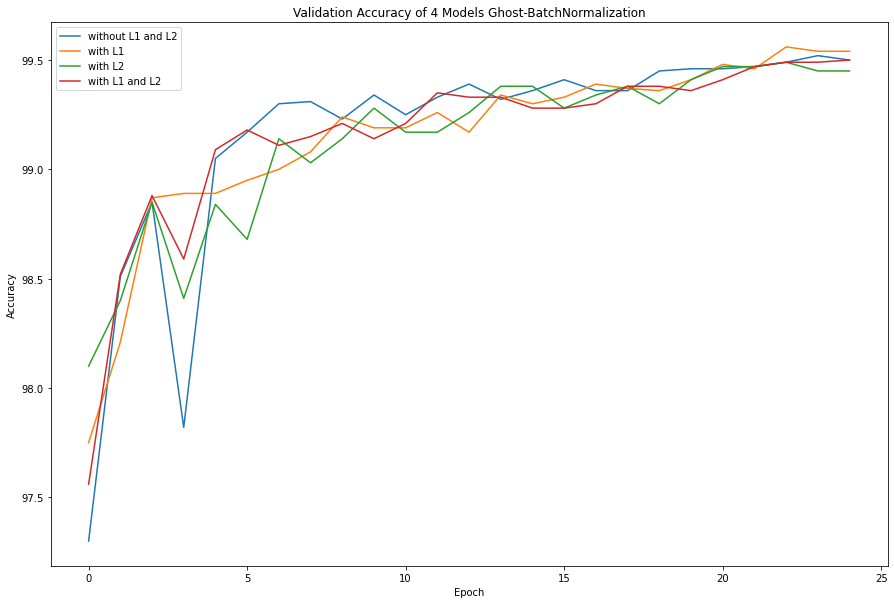

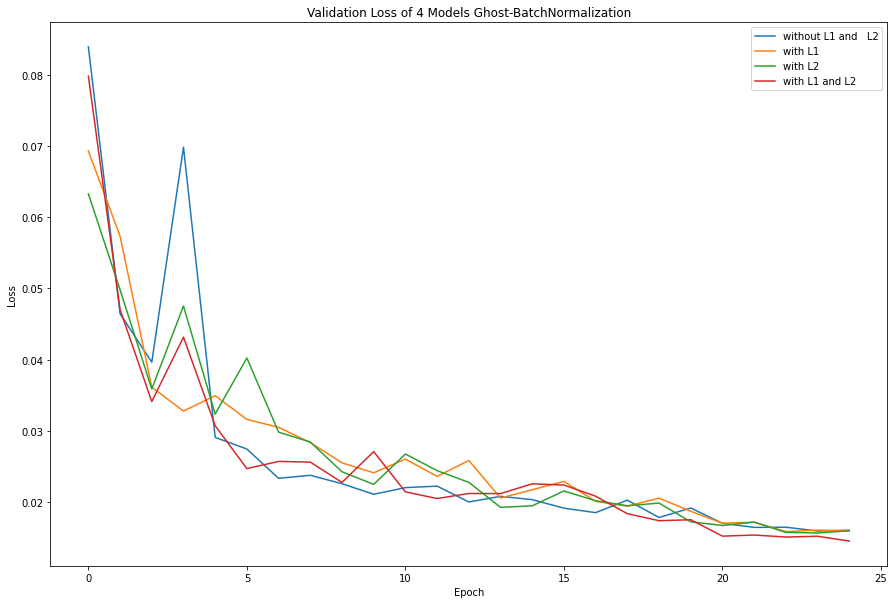

In [17]:
# Plot Val Accuracy and Loss curve

GhostBatchNorm_Model.gbn_plot_acc('ValidationAcc_GBN')
GhostBatchNorm_Model.gbn_plot_loss('ValidationLoss_GBN')

In [0]:
# Misclassified Images

from google.colab import files
def misclassifiedOnes(model, filename):
  model = model.to(device)
  dataiter = iter(testloader) 
  count = 0
  fig = plt.figure(figsize=(13,13))
  
  while count<25:
      images, labels = dataiter.next()
      images, labels = images.to(device), labels.to(device)
    
      output = model(images) 
      _, pred = torch.max(output, 1)   # convert output probabilities to predicted class
      images = images.cpu().numpy() # conv images to numpy format

      for idx in np.arange(128):
        if pred[idx]!=labels[idx]:
          ax = fig.add_subplot(5, 5, count+1, xticks=[], yticks=[])
          count=count+1
          ax.imshow(np.squeeze(images[idx]), cmap='cool')
          ax.set_title("Pred-{} (Target-{})".format(str(pred[idx].item()), str(labels[idx].item())), color="Black")
          if count==25:
            break
      plt.savefig(filename)
  files.download(filename)

In [5]:
models = {'model1': 'withoutL1_L2_BN', 'model2': 'withL1_BN', 'model3': 'withL2_BN', 'model4': 'withL1_L2_BN' }

for i in models:
  print('Misclassifed Images from {}'.format(i))
  print('*'*30)
  filename = str(models[i])+'.png'
  model.load_state_dict(torch.load(str(i)+ '.pt'))
  utils.misclassifiedOnes(model, testloader, filename)


Misclassifed Images from model1
******************************


NameError: ignored

In [0]:
# GBN Model Summary 
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
modelGBN = main.GBNet().to(device)
summary(modelGBN, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
    GhostBatchNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
    GhostBatchNorm-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           1,440
             ReLU-11           [-1, 16, 10, 10]               0
   GhostBatchNorm-12           [-1, 16, 10, 10]              32
          Dropout-13           [-1, 16, 10, 10]               0
           Conv2d-14             [-1, 1

**Run all 4 models using an iterator**

In [0]:
GBNmodelTuple = iter(withoutL1_L2_GBN(),
  withL1_GBN(), withL2_GBN(),
  withL1_L2_GBN())

# But one problem we've split the this into two model5 & model6, model7 & model8

print(GBNmodelTuple.__next__())

  0%|          | 0/469 [00:00<?, ?it/s]

without L1 and L2 regularization with GBN
EPOCH: 1


Loss=0.0814695879817009 Batch_id=468 Accuracy=85.10: 100%|██████████| 469/469 [00:11<00:00, 40.13it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0801).  Saving model ...

Test set: Average loss: 0.0801, Accuracy: 9737/10000 (97.37%)

EPOCH: 2


Loss=0.0984615907073021 Batch_id=468 Accuracy=97.42: 100%|██████████| 469/469 [00:11<00:00, 40.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0801 --> 0.0419).  Saving model ...

Test set: Average loss: 0.0419, Accuracy: 9865/10000 (98.65%)

EPOCH: 3


Loss=0.11294104903936386 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:11<00:00, 39.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0419 --> 0.0381).  Saving model ...

Test set: Average loss: 0.0381, Accuracy: 9881/10000 (98.81%)

EPOCH: 4


Loss=0.10795894265174866 Batch_id=468 Accuracy=98.07: 100%|██████████| 469/469 [00:11<00:00, 39.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0381 --> 0.0358).  Saving model ...

Test set: Average loss: 0.0358, Accuracy: 9885/10000 (98.85%)

EPOCH: 5


Loss=0.03216846287250519 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:11<00:00, 40.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0358 --> 0.0332).  Saving model ...

Test set: Average loss: 0.0332, Accuracy: 9894/10000 (98.94%)

EPOCH: 6


Loss=0.007391984108835459 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:11<00:00, 40.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0332 --> 0.0286).  Saving model ...

Test set: Average loss: 0.0286, Accuracy: 9905/10000 (99.05%)

EPOCH: 7


Loss=0.054964419454336166 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:11<00:00, 40.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0286 --> 0.0261).  Saving model ...

Test set: Average loss: 0.0261, Accuracy: 9921/10000 (99.21%)

EPOCH: 8


Loss=0.10581499338150024 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:11<00:00, 40.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0329, Accuracy: 9900/10000 (99.00%)

EPOCH: 9


Loss=0.06410770863294601 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:11<00:00, 40.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0261 --> 0.0248).  Saving model ...

Test set: Average loss: 0.0248, Accuracy: 9921/10000 (99.21%)

EPOCH: 10


Loss=0.05590694770216942 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:11<00:00, 39.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0248 --> 0.0217).  Saving model ...

Test set: Average loss: 0.0217, Accuracy: 9932/10000 (99.32%)

EPOCH: 11


Loss=0.07136809080839157 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:11<00:00, 40.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0290, Accuracy: 9915/10000 (99.15%)

EPOCH: 12


Loss=0.004643345717340708 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:11<00:00, 39.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0285, Accuracy: 9901/10000 (99.01%)

EPOCH: 13


Loss=0.07074104249477386 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:11<00:00, 39.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9929/10000 (99.29%)

EPOCH: 14


Loss=0.006821423768997192 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:11<00:00, 39.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9935/10000 (99.35%)

EPOCH: 15


Loss=0.003962228540331125 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:11<00:00, 39.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0217 --> 0.0206).  Saving model ...

Test set: Average loss: 0.0206, Accuracy: 9932/10000 (99.32%)

EPOCH: 16


Loss=0.014821703545749187 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:11<00:00, 39.33it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0206 --> 0.0188).  Saving model ...

Test set: Average loss: 0.0188, Accuracy: 9941/10000 (99.41%)

EPOCH: 17


Loss=0.016631240025162697 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:11<00:00, 39.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0188 --> 0.0185).  Saving model ...

Test set: Average loss: 0.0185, Accuracy: 9938/10000 (99.38%)

EPOCH: 18


Loss=0.019021570682525635 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:11<00:00, 40.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0185 --> 0.0168).  Saving model ...

Test set: Average loss: 0.0168, Accuracy: 9939/10000 (99.39%)

EPOCH: 19


Loss=0.02037821151316166 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:11<00:00, 39.27it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9939/10000 (99.39%)

EPOCH: 20


Loss=0.008211612701416016 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:11<00:00, 39.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 9945/10000 (99.45%)

EPOCH: 21


Loss=0.02681061625480652 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:11<00:00, 39.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0168 --> 0.0161).  Saving model ...

Test set: Average loss: 0.0161, Accuracy: 9949/10000 (99.49%)

EPOCH: 22


Loss=0.0008177608251571655 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:12<00:00, 39.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 9945/10000 (99.45%)

EPOCH: 23


Loss=0.00044955810881219804 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:11<00:00, 39.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0161 --> 0.0155).  Saving model ...

Test set: Average loss: 0.0155, Accuracy: 9952/10000 (99.52%)

EPOCH: 24


Loss=0.0036856234073638916 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:12<00:00, 39.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0155 --> 0.0148).  Saving model ...

Test set: Average loss: 0.0148, Accuracy: 9953/10000 (99.53%)

EPOCH: 25


Loss=0.006543720606714487 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:11<00:00, 39.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0148, Accuracy: 9954/10000 (99.54%)

with L1 regularization with GBN
EPOCH: 1


Loss=0.18094760179519653 Batch_id=468 Accuracy=86.05: 100%|██████████| 469/469 [00:12<00:00, 36.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0688).  Saving model ...

Test set: Average loss: 0.0688, Accuracy: 9796/10000 (97.96%)

EPOCH: 2


Loss=0.020387055352330208 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [00:13<00:00, 35.20it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0688 --> 0.0494).  Saving model ...

Test set: Average loss: 0.0494, Accuracy: 9837/10000 (98.37%)

EPOCH: 3


Loss=0.1741466224193573 Batch_id=468 Accuracy=97.81: 100%|██████████| 469/469 [00:13<00:00, 34.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0494 --> 0.0380).  Saving model ...

Test set: Average loss: 0.0380, Accuracy: 9888/10000 (98.88%)

EPOCH: 4


Loss=0.09032464027404785 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:13<00:00, 34.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0380 --> 0.0372).  Saving model ...

Test set: Average loss: 0.0372, Accuracy: 9880/10000 (98.80%)

EPOCH: 5


Loss=0.053133122622966766 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:13<00:00, 35.34it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0372 --> 0.0355).  Saving model ...

Test set: Average loss: 0.0355, Accuracy: 9879/10000 (98.79%)

EPOCH: 6


Loss=0.0721706673502922 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:13<00:00, 35.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0355 --> 0.0247).  Saving model ...

Test set: Average loss: 0.0247, Accuracy: 9925/10000 (99.25%)

EPOCH: 7


Loss=0.05293235182762146 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:13<00:00, 35.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0290, Accuracy: 9908/10000 (99.08%)

EPOCH: 8


Loss=0.04835682734847069 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:13<00:00, 35.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 9924/10000 (99.24%)

EPOCH: 9


Loss=0.053730569779872894 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:13<00:00, 35.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0264, Accuracy: 9919/10000 (99.19%)

EPOCH: 10


Loss=0.01458654087036848 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:13<00:00, 35.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0247 --> 0.0230).  Saving model ...

Test set: Average loss: 0.0230, Accuracy: 9931/10000 (99.31%)

EPOCH: 11


Loss=0.1050981804728508 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:13<00:00, 35.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0284, Accuracy: 9910/10000 (99.10%)

EPOCH: 12


Loss=0.04074535518884659 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:13<00:00, 35.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0230 --> 0.0222).  Saving model ...

Test set: Average loss: 0.0222, Accuracy: 9921/10000 (99.21%)

EPOCH: 13


Loss=0.03232959657907486 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:13<00:00, 35.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0222 --> 0.0201).  Saving model ...

Test set: Average loss: 0.0201, Accuracy: 9934/10000 (99.34%)

EPOCH: 14


Loss=0.016737209632992744 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:13<00:00, 35.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9931/10000 (99.31%)

EPOCH: 15


Loss=0.09501675516366959 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:15<00:00, 29.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0201 --> 0.0181).  Saving model ...

Test set: Average loss: 0.0181, Accuracy: 9949/10000 (99.49%)

EPOCH: 16


Loss=0.02240004390478134 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:13<00:00, 33.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0181 --> 0.0173).  Saving model ...

Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

EPOCH: 17


Loss=0.09726652503013611 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:13<00:00, 34.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9935/10000 (99.35%)

EPOCH: 18


Loss=0.03510399907827377 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:13<00:00, 34.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 9941/10000 (99.41%)

EPOCH: 19


Loss=0.01753096655011177 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:13<00:00, 34.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0173 --> 0.0168).  Saving model ...

Test set: Average loss: 0.0168, Accuracy: 9946/10000 (99.46%)

EPOCH: 20


Loss=0.0528959222137928 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:13<00:00, 35.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9940/10000 (99.40%)

EPOCH: 21


Loss=0.05879572033882141 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 35.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0168 --> 0.0151).  Saving model ...

Test set: Average loss: 0.0151, Accuracy: 9953/10000 (99.53%)

EPOCH: 22


Loss=0.017886724323034286 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 35.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0151 --> 0.0148).  Saving model ...

Test set: Average loss: 0.0148, Accuracy: 9952/10000 (99.52%)

EPOCH: 23


Loss=0.05591578781604767 Batch_id=468 Accuracy=99.43: 100%|██████████| 469/469 [00:13<00:00, 34.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0151, Accuracy: 9953/10000 (99.53%)

EPOCH: 24


Loss=0.01764201745390892 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:13<00:00, 35.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0148, Accuracy: 9954/10000 (99.54%)

EPOCH: 25


Loss=0.015780432149767876 Batch_id=468 Accuracy=99.46: 100%|██████████| 469/469 [00:13<00:00, 35.36it/s]


Validation loss has  decreased (0.0148 --> 0.0147).  Saving model ...

Test set: Average loss: 0.0147, Accuracy: 9954/10000 (99.54%)



  0%|          | 0/469 [00:00<?, ?it/s]

with L2 regularization with GBN
EPOCH: 1


Loss=0.11682453006505966 Batch_id=468 Accuracy=84.43: 100%|██████████| 469/469 [00:16<00:00, 29.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0599).  Saving model ...

Test set: Average loss: 0.0599, Accuracy: 9814/10000 (98.14%)

EPOCH: 2


Loss=0.05144048109650612 Batch_id=468 Accuracy=97.38: 100%|██████████| 469/469 [00:13<00:00, 35.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0599 --> 0.0424).  Saving model ...

Test set: Average loss: 0.0424, Accuracy: 9859/10000 (98.59%)

EPOCH: 3


Loss=0.016827881336212158 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:12<00:00, 37.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Validation loss has  decreased (0.0424 --> 0.0306).  Saving model ...

Test set: Average loss: 0.0306, Accuracy: 9900/10000 (99.00%)

EPOCH: 4


Loss=0.03324195370078087 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:12<00:00, 37.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0390, Accuracy: 9864/10000 (98.64%)

EPOCH: 5


Loss=0.027546893805265427 Batch_id=266 Accuracy=98.30:  56%|█████▋    | 264/469 [00:07<00:05, 40.22it/s]

In [0]:
# Validation Accuracy 

class plots(Test_Train):
  def __init__(self):
    pass
  
  def validationAcc(self, accValues = [], GBN=False):
    self.accValues = accValues
    self.GBN = GBN

    if self.GBN:
      plotTitle = "with Ghost Batch-Normalization"
      figname = 'withGBN.png'
    else:
      plotTitle = "with Batch-Normalization"
      figname = "withBN.png"


    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    ax.plot(accValues[0])
    ax.plot(accValues[1])
    ax.plot(accValues[2])
    ax.plot(accValues[3])
    ax.set(title="Validation Accuracy of 4 Models"+str(plotTitle), xlabel="Epoch", ylabel="Accuracy")
    ax.legend(['without L1 and L2', 'with L1', 'with L2', 'with L1 and L2'], loc='best')
    plt.savefig(str(figname))
    plt.show()


  def validationLoss(self, lossValues = []):
    self.lossValues = lossValues
    plt.figure(figsize = (15,10))
    ax = plt.subplot(111)
    ax.plot(lossValues[0])
    ax.plot(lossValues[1])
    ax.plot(lossValues[2])
    ax.plot(lossValues[3])
    ax.set(title="Validation Loss of 4 Models"+str(plotTitle), xlabel='Epoch', ylabel = 'Loss')
    ax.legend(['without L1 & L2', 'with L1', 'with L2', 'with L1 & L2'], loc = 'best')
    plt.savefig(str(figname))
    plt.show()

    


c = plots()
c.validationAcc([acc5, acc6, acc7, acc8])
c.validationLoss([loss5, loss6, loss7, loss8])

NameError: ignored

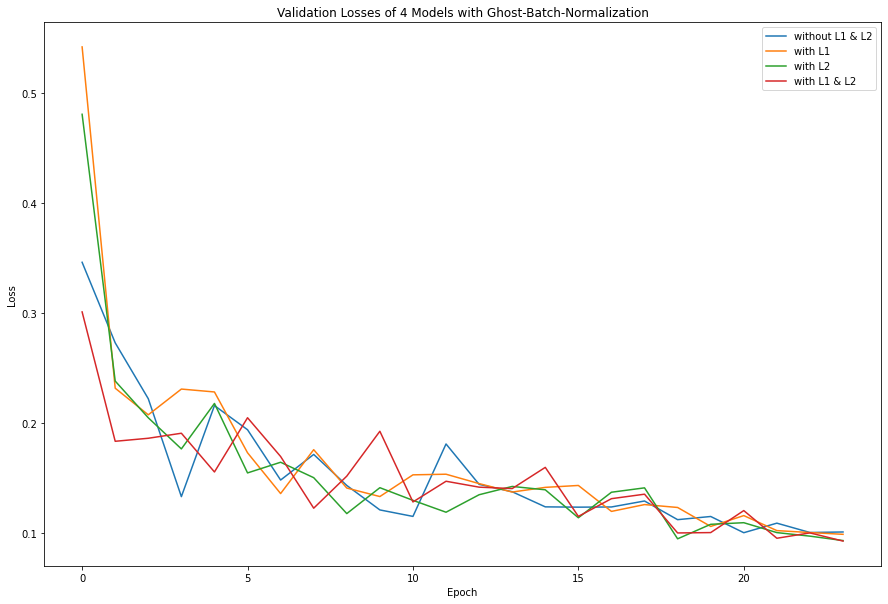

In [0]:
# Validation Loss

class loss_plot(Test_Train):
  def __init__(self):
    plt.figure(figsize = (15,10))
    ax = plt.subplot(111)
    ax.plot(loss5[:-1])
    ax.plot(loss6[:-1])
    ax.plot(loss7[:-1])
    ax.plot(loss8[:-1])
    ax.set(title='Validation Losses of 4 Models with Ghost-Batch-Normalization', xlabel='Epoch', ylabel = 'Loss')
    ax.legend(['without L1 & L2', 'with L1', 'with L2', 'with L1 & L2'], loc = 'best')
    plt.savefig('ValidationLossesGBN.png')
    plt.show()

e = loss_plot()
e


Misclassifed Images from model5
******************************
Misclassifed Images from model6
******************************
Misclassifed Images from model7
******************************
Misclassifed Images from model8
******************************


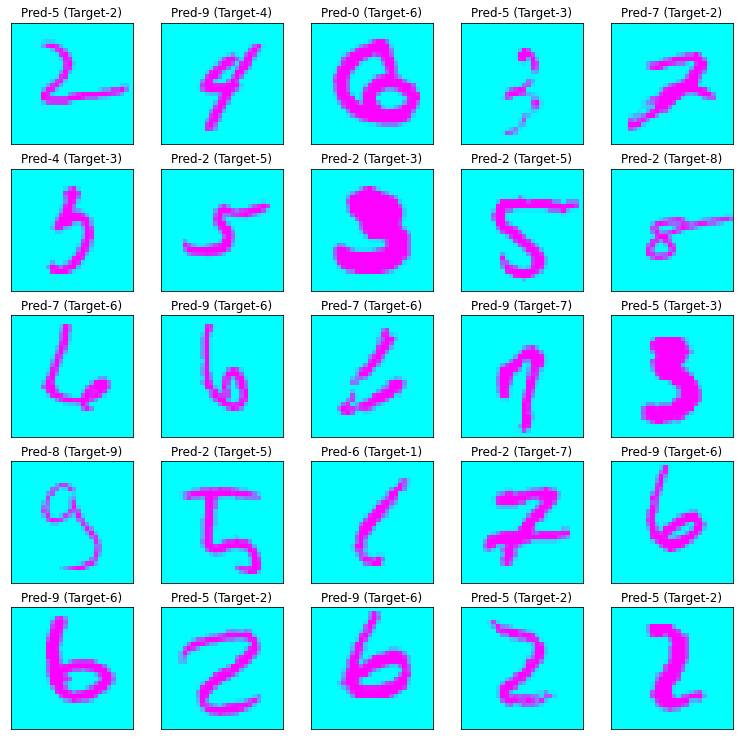

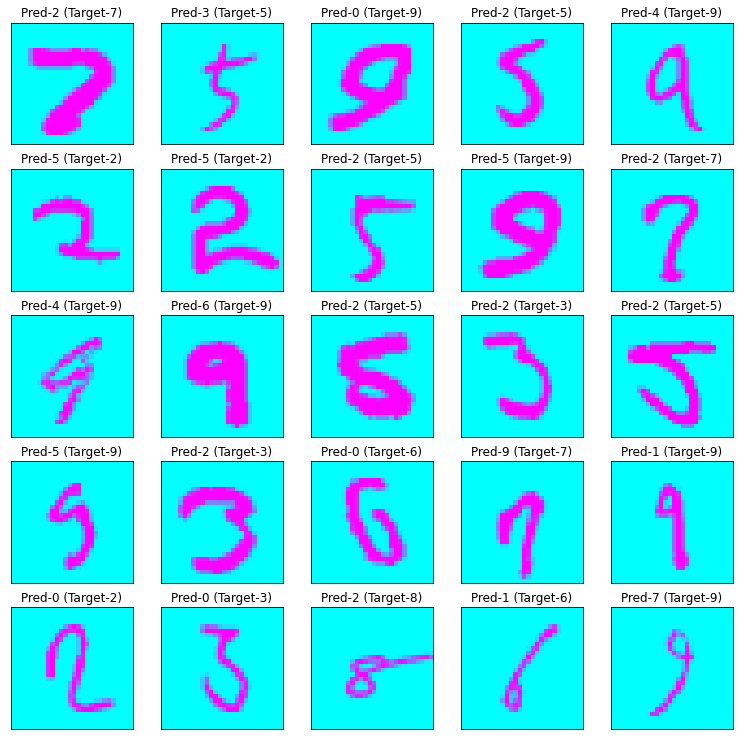

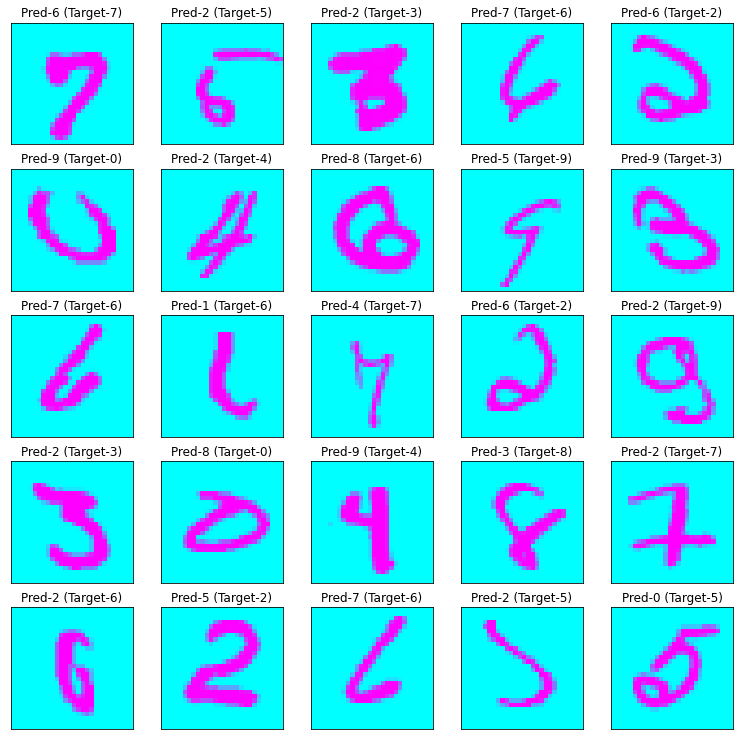

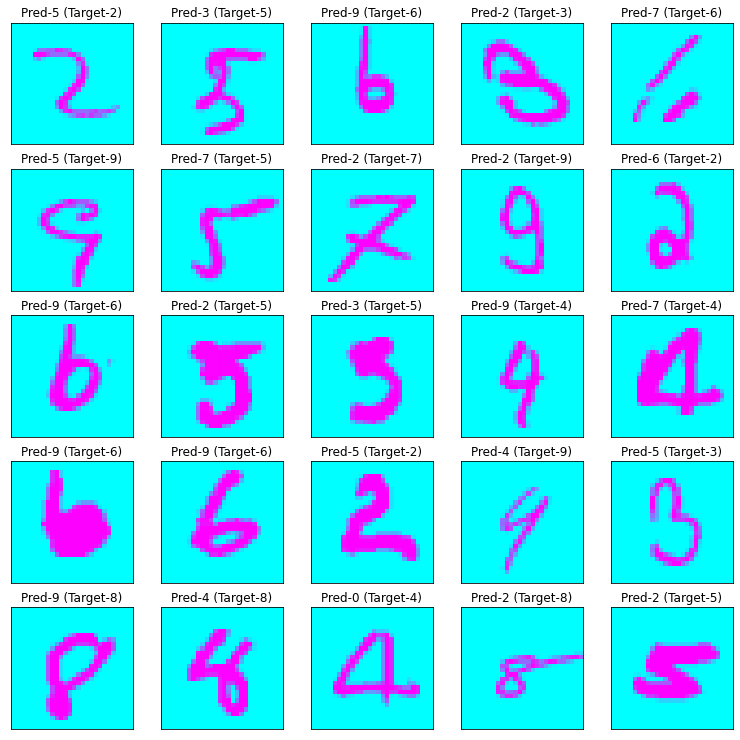

In [0]:
GBNmodels = {'model5': 'withoutL1_L2_GBN', 'model6': 'withL1_GBN', 'model7': 'withL2_GBN', 'model8': 'withL1_L2_GBN' }

for i in GBNmodels:
  print('Misclassifed Images from {}'.format(i))
  print('*'*30)

  model.load_state_dict(torch.load(str(i)+ '.pt'))
  misclassifiedOnes(model, filename = str(GBNmodels[i])+'.png')
